# Explore here

In [132]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
total_data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [133]:
total_data.shape
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [134]:
total_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [135]:
total_data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

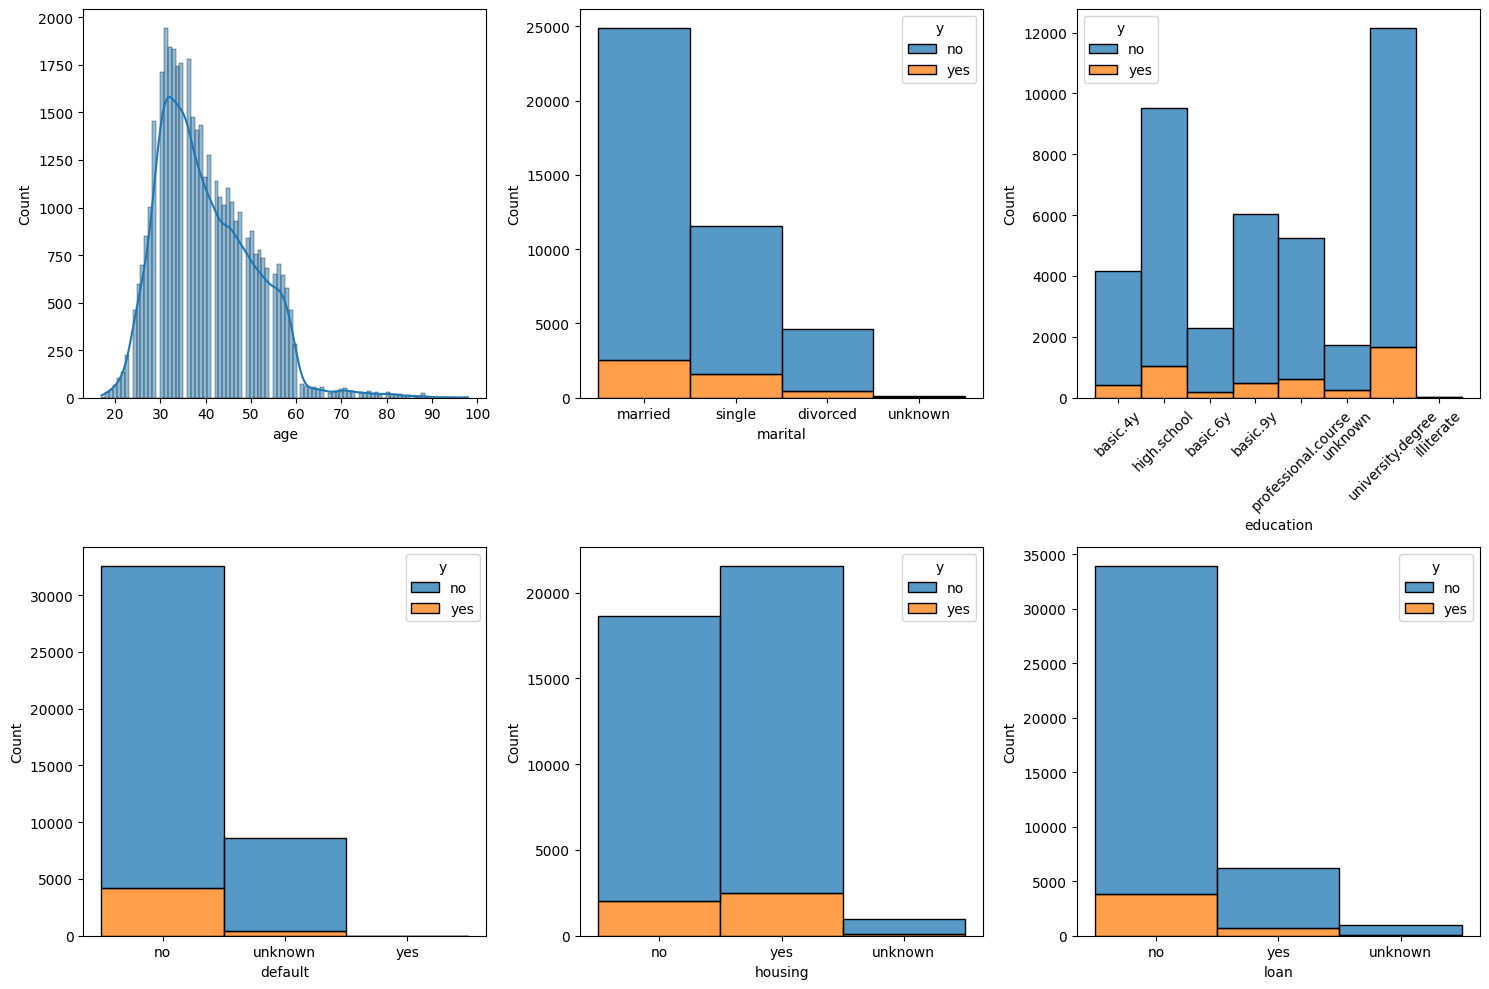

In [136]:
fig, axis = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(ax=axis[0, 0], data=data_to_plot, x="age", kde=True)
sns.histplot(ax=axis[0, 1], data=data_to_plot, x="marital", hue="y", multiple="stack")
sns.histplot(ax=axis[0, 2], data=data_to_plot, x="education", hue="y", multiple="stack")

axis[0, 2].tick_params(axis='x', rotation=45) 

sns.histplot(ax=axis[1, 0], data=data_to_plot, x="default", hue="y", multiple="stack") #DEFAULT = CURRENTLY HAS CREDIT OR NO
sns.histplot(ax=axis[1, 1], data=data_to_plot, x="housing", hue="y", multiple="stack")
sns.histplot(ax=axis[1, 2], data=data_to_plot, x="loan", hue="y", multiple="stack")


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

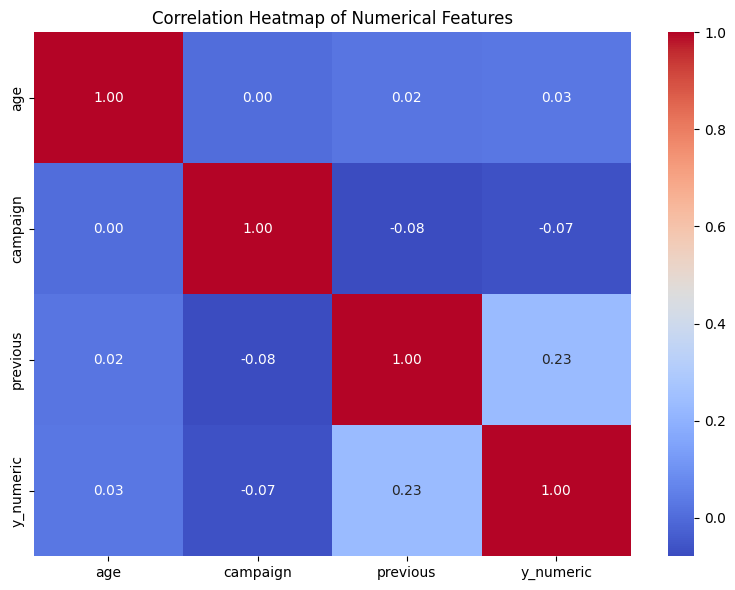

In [137]:
data_for_corr = total_data.copy() # Create a copy to avoid modifying the original

# Convert 'y' column to numerical (1 for 'yes', 0 for 'no')
data_for_corr['y_numeric'] = data_for_corr['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Select only the numerical columns (including the new 'y_numeric')
numerical_cols = ['age', 'campaign', 'previous', 'y_numeric']
correlation_data = data_for_corr[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
fig, axis = plt.subplots(figsize=(8, 6)) # Adjust figsize as needed

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axis) # Added cmap and ax

plt.title('Correlation Heatmap of Numerical Features') # Add a title
plt.tight_layout()
plt.show()

In [138]:
total_data_new.describe()  

# Number of contacts made during this campaign
# Number of contacts made during the previous campaign

,age,campaign,previous,job_n,marital_n,education_n,default_n,housing_n,loan_n,month_n
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,0.172963,3.673691,0.510634,3.277532,0.208872,0.571914,0.199767,2.250097
std,10.42125,2.770014,0.494901,2.454116,0.696779,2.185525,0.406686,0.541209,0.456002,2.429079
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,2.000000,0.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,2.000000
75%,47.00000,3.000000,0.000000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,3.000000
max,98.00000,56.000000,7.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,9.000000


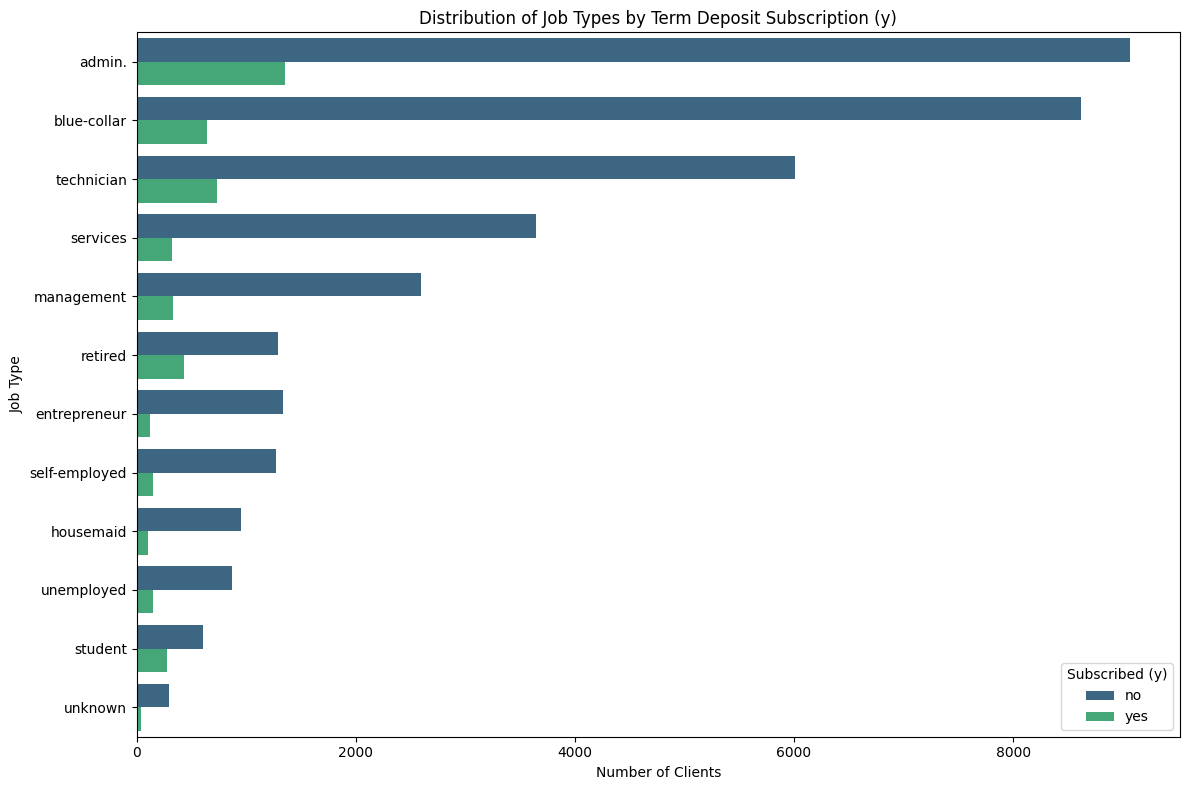

In [139]:
plt.figure(figsize=(12, 8)) # Adjusted figure size
sns.countplot(data=data_to_plot, y='job', hue='y', order=data_to_plot['job'].value_counts().index, palette='viridis')

plt.title('Distribution of Job Types by Term Deposit Subscription (y)')
plt.xlabel('Number of Clients')
plt.ylabel('Job Type')
plt.legend(title='Subscribed (y)') # Add a legend title
plt.tight_layout()
plt.show()

In [140]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

data_for_encoding = total_data.copy()

# --- 1. Handle Categorical Variables ---

le = LabelEncoder()
data_for_encoding['y_encoded'] = le.fit_transform(data_for_encoding['y'])

data_for_encoding = data_for_encoding.drop('y', axis=1)

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome'] # Assuming these are in total_data_new

# Apply One-Hot Encoding
data_encoded = pd.get_dummies(data_for_encoding, columns=categorical_features, drop_first=True) # drop_first avoids multicollinearity


# --- 2. Split Data (Train/Test Split) ---

X = data_encoded.drop('y_encoded', axis=1) # Features (all columns except the encoded target)
y = data_encoded['y_encoded']             # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # Stratify to maintain proportion of 'y'

# --- 3. Identify Numerical Features for Scaling ---

# the original numerical ones.
numerical_features = ['age', 'campaign', 'previous'] # These should be the remaining original numerical columns

# --- 4. Apply Min-Max Scaling ---

scaler = MinMaxScaler()

# Fit the scaler on the training data's numerical features
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform the test data's numerical features using the *same* fitted scaler
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("Shape of X_train after encoding and scaling:", X_train.shape)
print("Shape of X_test after encoding and scaling:", X_test.shape)
print("\nFirst 5 rows of X_train (numerical columns scaled):")
print(X_train[numerical_features].head()) # Show scaled numerical columns

Shape of X_train after encoding and scaling: (30891, 50)
Shape of X_test after encoding and scaling: (10297, 50)

First 5 rows of X_train (numerical columns scaled):
            age  campaign  previous
34300  0.148148  0.163636  0.000000
25076  0.456790  0.000000  0.142857
17533  0.469136  0.036364  0.000000
35820  0.320988  0.090909  0.000000
1080   0.456790  0.072727  0.000000


In [142]:
# Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data["contact_n"] = pd.factorize(total_data["contact"])[0]
total_data["month_n"] = pd.factorize(total_data["month"])[0]
total_data["day_of_week_n"] = pd.factorize(total_data["day_of_week"])[0]
total_data["poutcome_n"] = pd.factorize(total_data["poutcome"])[0]
total_data["y_n"] = pd.factorize(total_data["y"])[0]
num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
total_data_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


In [143]:
# Feature selection

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("y_n", axis = 1)
y = total_data_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,0.000000,0.019497,0.203781
1,0.0,0.0,1.000000,0.981183,1.000000
2,0.0,0.0,0.333333,0.138291,0.512287
3,0.0,0.0,0.937500,0.956926,0.859735
4,0.0,0.0,0.937500,0.957379,0.859735


In [144]:
X_test_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.5,0.142857,0.333333,0.150759,0.512287
1,0.0,0.000000,0.937500,0.958059,0.859735
2,0.5,0.142857,0.333333,0.153933,0.512287
3,0.0,0.000000,1.000000,0.982317,1.000000
4,0.0,0.000000,1.000000,0.981410,1.000000


In [145]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [146]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed,y_n
0,0.0,0.0,0.000000,0.019497,0.203781,1.0
1,0.0,0.0,1.000000,0.981183,1.000000,0.0
2,0.0,0.0,0.333333,0.138291,0.512287,0.0
3,0.0,0.0,0.937500,0.956926,0.859735,0.0
4,0.0,0.0,0.937500,0.957379,0.859735,0.0


In [147]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [148]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [149]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.], shape=(4119,))

In [150]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8953629521728574

In [151]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [152]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [153]:
model = LogisticRegression(C = 0.1, penalty = "l2", solver = "liblinear")
model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [154]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.], shape=(4119,))

In [155]:
accuracy_score(y_test, y_pred)

0.8975479485311969

In [156]:
from pickle import dump

dump(model, open("../models/logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))